# Feature Importance

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import  datasets

In [2]:
dataobj = datasets.load_wine()

In [4]:
X = pd.DataFrame(dataobj.data, columns=list(dataobj.feature_names))
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [6]:
y = dataobj.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [9]:
df = pd.concat([X, pd.DataFrame(y, columns=['target'])], axis = 1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Split data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)
print(f'X_train.shape = {X_train.shape}')
print(f'X_test.shape = {X_test.shape}')

X_train.shape = (124, 13)
X_test.shape = (54, 13)


# Feature Importance

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
model = RandomForestClassifier(n_estimators=500, random_state=1, n_jobs=-1)
model

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

In [15]:
## training model
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

In [25]:
## feature importance
imp = model.feature_importances_
cols = list(X.columns)

imp_re = pd.DataFrame(
    {
        'feature' : cols,
        'importance' : imp
    }
)
imp_re.set_index('feature', inplace=True)
imp_re.sort_values(by='importance', ascending=False)

,importance
feature,
proline,0.179927
color_intensity,0.153158
flavanoids,0.146123
alcohol,0.138224
od280/od315_of_diluted_wines,0.114818
hue,0.077525
total_phenols,0.058236
malic_acid,0.030856
alcalinity_of_ash,0.030000


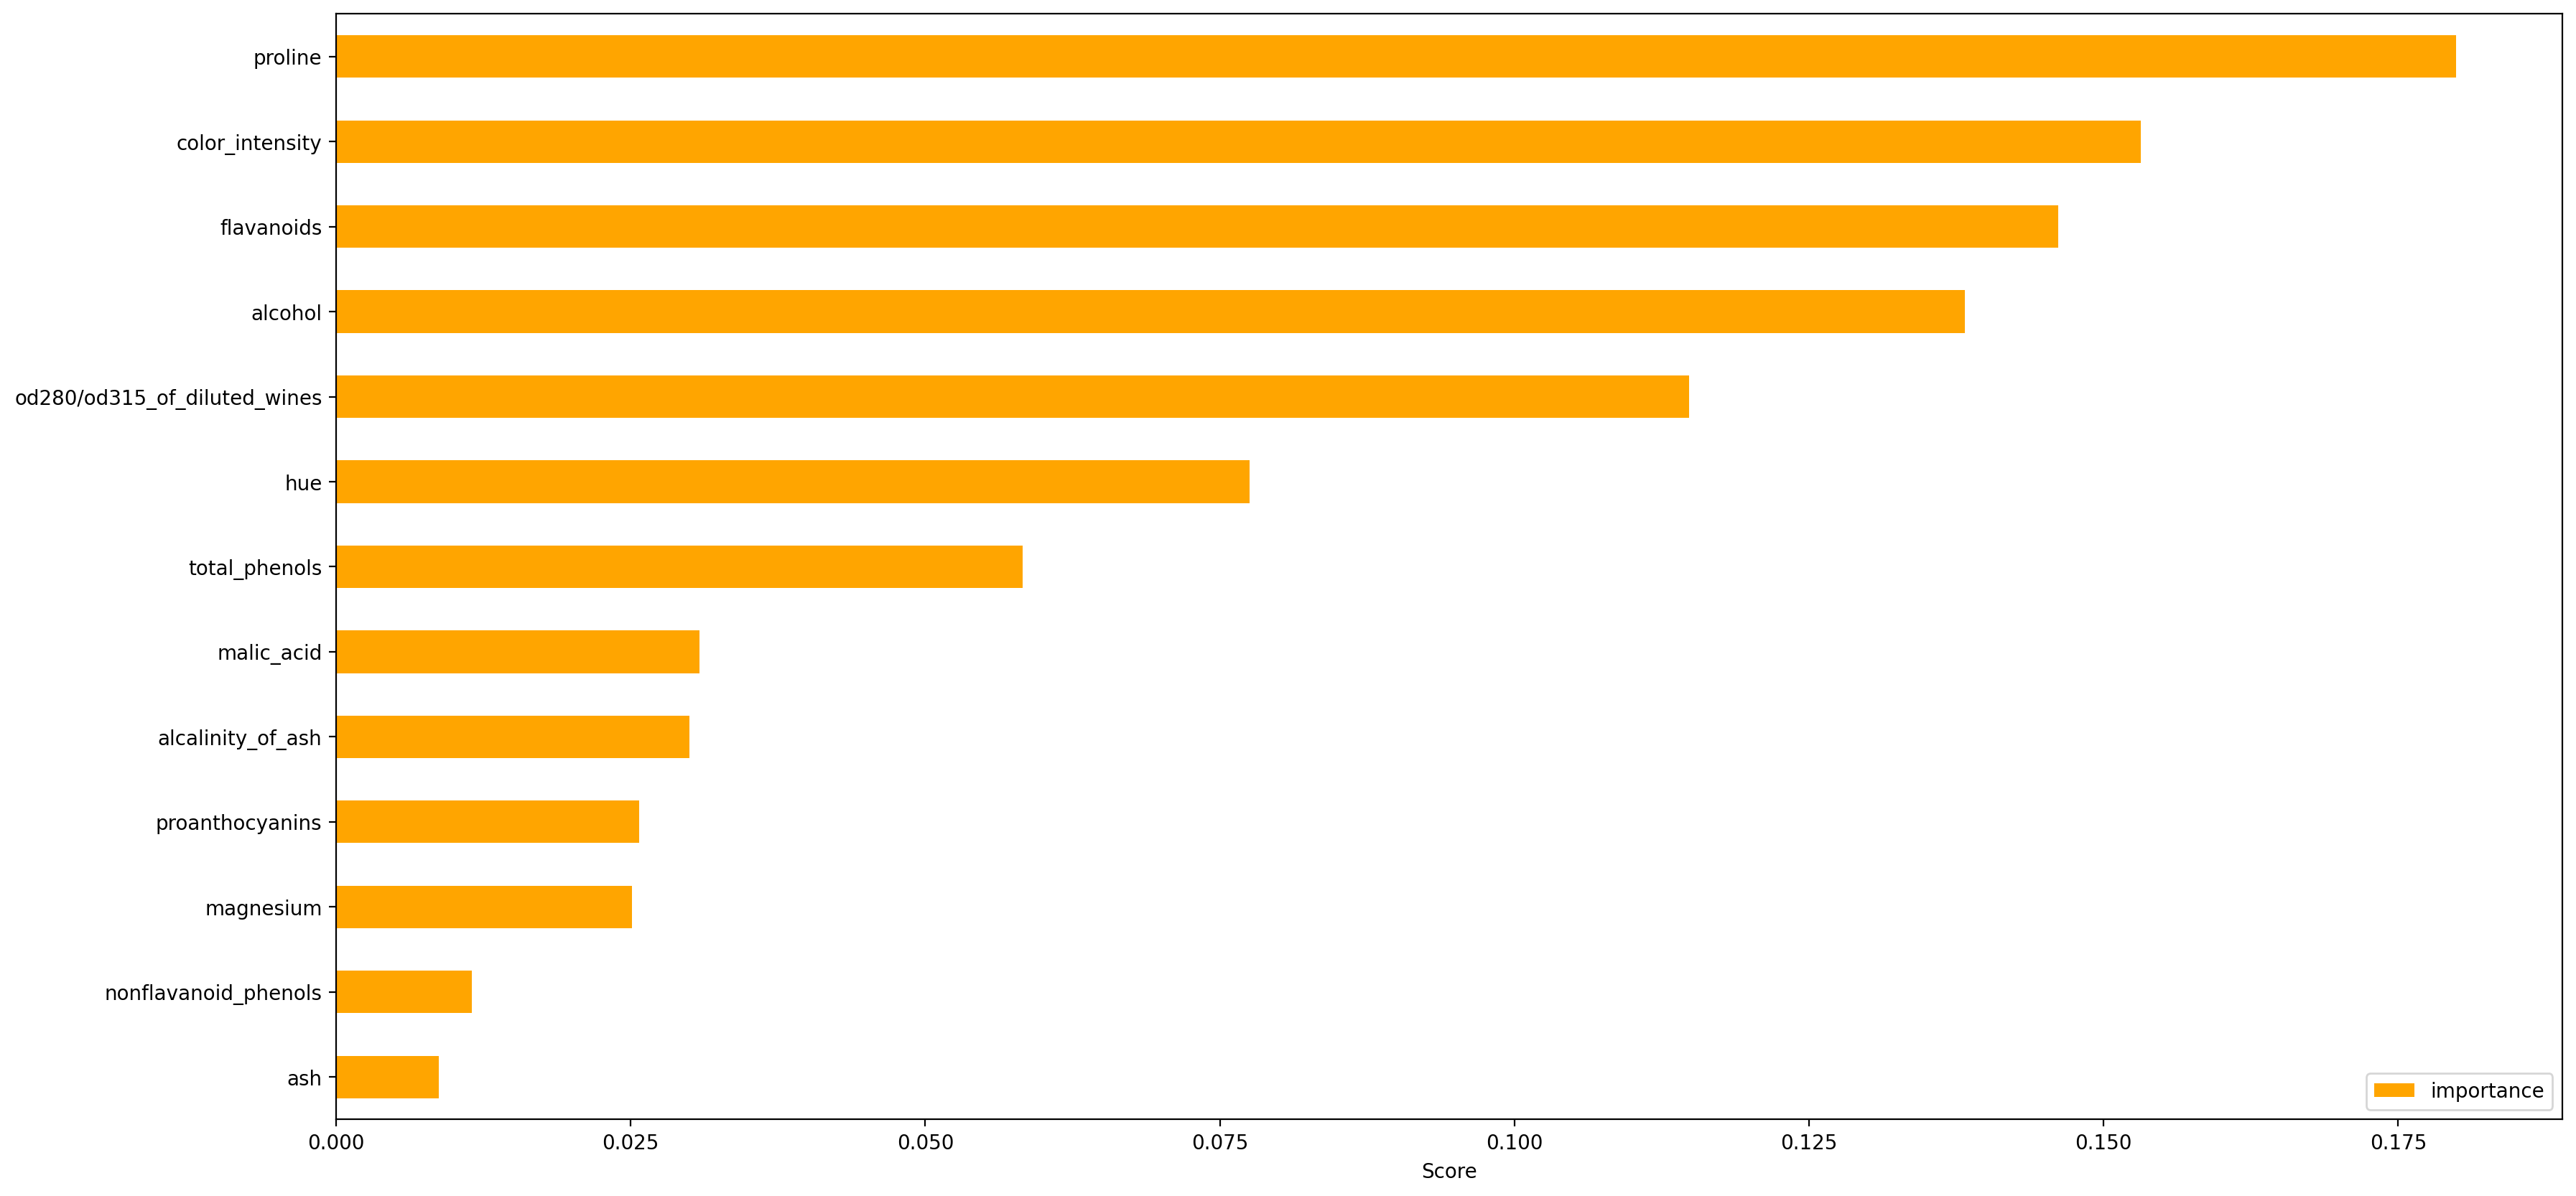

In [65]:
## ploting
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


fig, ax = plt.subplots(figsize = (20, 10))

ax0 = imp_re.sort_values(by='importance').plot(kind='barh', ax=ax, color='orange')
ax0.set_ylabel('')
ax0.set_xlabel('Score');

# Slk implementation

In [66]:
from sklearn.feature_selection import SelectFromModel

In [103]:
model = RandomForestClassifier(n_estimators=1000, random_state=1, n_jobs=-1)
sfm = SelectFromModel(estimator=model, max_features=4)
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=1),
                max_features=4)

In [104]:
sfm.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True, False, False,  True])

In [105]:
X.columns[sfm.get_support()]

Index(['alcohol', 'flavanoids', 'color_intensity', 'proline'], dtype='object')

In [106]:
X[X.columns[sfm.get_support()]]

,alcohol,flavanoids,color_intensity,proline
0,14.23,3.06,5.64,1065.0
1,13.20,2.76,4.38,1050.0
2,13.16,3.24,5.68,1185.0
3,14.37,3.49,7.80,1480.0
4,13.24,2.69,4.32,735.0
...,...,...,...,...
173,13.71,0.61,7.70,740.0
174,13.40,0.75,7.30,750.0
175,13.27,0.69,10.20,835.0
176,13.17,0.68,9.30,840.0


In [107]:
## transfrom
X_train_t = sfm.transform(X_train)
X_test_t = sfm.transform(X_test)

In [108]:
pd.DataFrame(X_train_t, columns=X.columns[sfm.get_support()]).head(10)

,alcohol,flavanoids,color_intensity,proline
0,14.37,3.49,7.80,1480.0
1,12.77,1.25,3.40,372.0
2,13.17,0.63,7.90,725.0
3,12.72,1.76,3.30,488.0
4,13.16,3.24,5.68,1185.0
5,13.58,0.84,8.66,750.0
6,12.70,2.55,2.57,463.0
7,13.56,2.78,6.25,1120.0
8,13.28,2.68,4.60,880.0
9,13.58,3.19,6.90,1515.0


In [109]:
pd.DataFrame(X_test_t, columns=X.columns[sfm.get_support()]).head()

,alcohol,flavanoids,color_intensity,proline
0,13.52,0.52,4.35,520.0
1,13.11,1.28,7.10,425.0
2,14.16,0.70,9.70,660.0
3,11.84,2.21,3.05,520.0
4,12.29,2.99,2.30,406.0
